# (N)on-(E)uclidean (U)pgrading
---
#### Description of NEU:
The NEU meta-algorithm learns a geometry for the input and (input $\times$ output) spaces by deforming them with a universal class of homeomorphisms + robustifies the involved loss functions to improve generalizability of the new and very flexible model.  
$$
\begin{aligned}
f \mapsto& \, \rho \circ f \circ \phi\\
\mathbb{E}_{\mathbb{P}}[\ell(f(X))] \mapsto & \,\max_{\mathbb{Q}\sim \mathbb{P}}\, \mathbb{E}_{\mathbb{Q}}[\ell(\rho(\phi(X), f\circ \phi(X)))].
\end{aligned}
$$
$\rho=\pi\circ \tilde{\rho}$, and $\tilde{\rho}$ and $\phi$ are "universal homeomorphisms" on $\operatorname{dom}(f)$ and on $\operatorname{dom}(f)\times \operatorname{co-dom}(f)$, respectively.  

---

---

#### Description of regression problem: 
In this notebook we implement the regression problem
$$
\begin{aligned}
y_i =&  \,f(x_i)\delta_i + \epsilon_i, \qquad i=1,\dots,N\\
\epsilon_i \sim &\, \mathcal{N}(0,\sigma),\\
\delta_i\sim &  \,U(1-D,1+D),
\end{aligned}
$$
for some *variance* $\sigma>0$ and *degree of model misspecification level* $0<D<1$.  
The quantity $\epsilon$ can be understood as, classical, additive noise while the quantity $\delta$ represents multiplicative noise.

---

---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [1]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())

Using TensorFlow backend.
/scratch/users/kratsioa/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


## Initialize Internal Variables/(Hyper)parameter(s)

## Check/Make Paths

In [2]:
Path('./outputs/models/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/GLd_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/Ed_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Linear_Regression/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/Base_Regressor/').mkdir(parents=True, exist_ok=True)
Path('./outputs/tables/').mkdir(parents=True, exist_ok=True)
Path('./outputs/results/').mkdir(parents=True, exist_ok=True)
Path('./inputs/data/').mkdir(parents=True, exist_ok=True)

# Generate Training Data

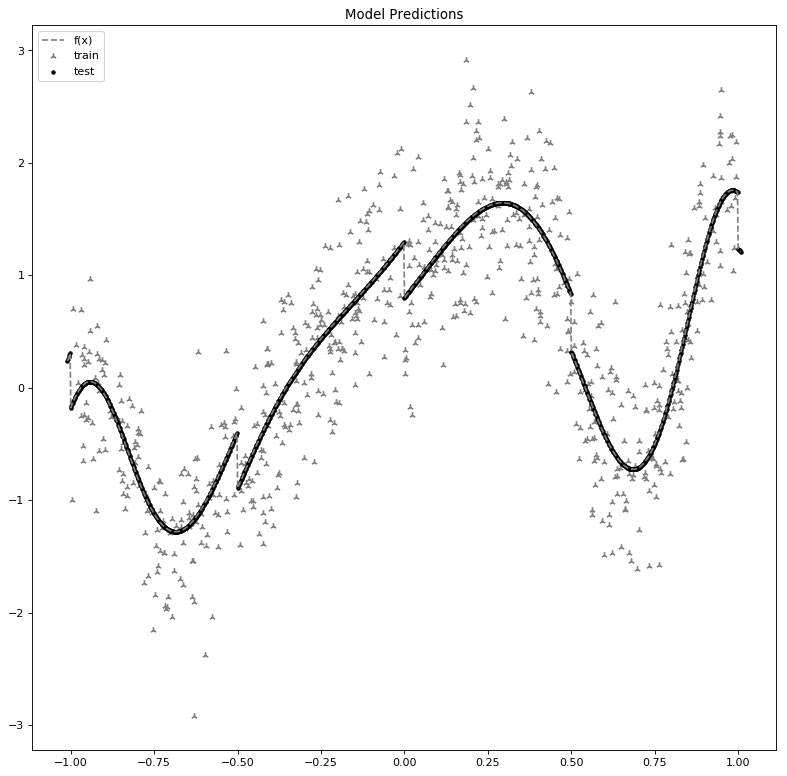

In [3]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
%run Data_Generator.ipynb

#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [4]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds =CV_folds, 
                                                 n_jobs = n_jobs, 
                                                 n_iter = n_iter, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 10.6min
[Parallel(n_jobs=3)]: Done  32 out of  32 | elapsed: 11.2min finished


Epoch 1/200
94/94 [==============================] - 1s 7ms/step - loss: 0.8303 - mse: 1.0198 - mae: 0.8303 - mape: 697.6454
Epoch 2/200
94/94 [==============================] - 1s 7ms/step - loss: 0.8145 - mse: 0.9830 - mae: 0.8145 - mape: 609.2590
Epoch 3/200
94/94 [==============================] - 1s 6ms/step - loss: 0.7934 - mse: 0.9426 - mae: 0.7934 - mape: 767.3669
Epoch 4/200
94/94 [==============================] - 1s 7ms/step - loss: 0.7748 - mse: 0.8973 - mae: 0.7748 - mape: 606.3759
Epoch 5/200
94/94 [==============================] - 1s 8ms/step - loss: 0.7600 - mse: 0.8598 - mae: 0.7600 - mape: 424.7102
Epoch 6/200
94/94 [==============================] - 1s 7ms/step - loss: 0.7598 - mse: 0.8745 - mae: 0.7598 - mape: 527.0388
Epoch 7/200
94/94 [==============================] - 1s 7ms/step - loss: 0.7484 - mse: 0.8648 - mae: 0.7484 - mape: 459.1639
Epoch 8/200
94/94 [==============================] - 1s 7ms/step - loss: 0.7424 - mse: 0.8310 - mae: 0.7424 - mape: 483.6390


94/94 [==============================] - 1s 7ms/step - loss: 0.5503 - mse: 0.4657 - mae: 0.5503 - mape: 234.6768
Epoch 66/200
94/94 [==============================] - 1s 7ms/step - loss: 0.5291 - mse: 0.4414 - mae: 0.5291 - mape: 187.5038
Epoch 67/200
94/94 [==============================] - 1s 6ms/step - loss: 0.5202 - mse: 0.4318 - mae: 0.5202 - mape: 323.6849
Epoch 68/200
94/94 [==============================] - 1s 7ms/step - loss: 0.5147 - mse: 0.4186 - mae: 0.5147 - mape: 334.7699
Epoch 69/200
94/94 [==============================] - 1s 7ms/step - loss: 0.5575 - mse: 0.4926 - mae: 0.5575 - mape: 314.8984
Epoch 70/200
94/94 [==============================] - 1s 6ms/step - loss: 0.5235 - mse: 0.4323 - mae: 0.5235 - mape: 149.8418
Epoch 71/200
94/94 [==============================] - 1s 7ms/step - loss: 0.5131 - mse: 0.4090 - mae: 0.5131 - mape: 207.1172
Epoch 72/200
94/94 [==============================] - 1s 8ms/step - loss: 0.5213 - mse: 0.4179 - mae: 0.5213 - mape: 234.5142
Epoch

94/94 [==============================] - 1s 8ms/step - loss: 0.4558 - mse: 0.3295 - mae: 0.4558 - mape: 439.1178
Epoch 130/200
94/94 [==============================] - 1s 9ms/step - loss: 0.4431 - mse: 0.3033 - mae: 0.4431 - mape: 156.4110
Epoch 131/200
94/94 [==============================] - 1s 7ms/step - loss: 0.4357 - mse: 0.3014 - mae: 0.4357 - mape: 267.9671
Epoch 132/200
94/94 [==============================] - 1s 7ms/step - loss: 0.4305 - mse: 0.2951 - mae: 0.4305 - mape: 211.7651
Epoch 133/200
94/94 [==============================] - 1s 8ms/step - loss: 0.4376 - mse: 0.3029 - mae: 0.4376 - mape: 306.0230
Epoch 134/200
94/94 [==============================] - 1s 8ms/step - loss: 0.4463 - mse: 0.3154 - mae: 0.4463 - mape: 227.2055
Epoch 135/200
94/94 [==============================] - 1s 7ms/step - loss: 0.4423 - mse: 0.3033 - mae: 0.4423 - mape: 332.1892
Epoch 136/200
94/94 [==============================] - 1s 9ms/step - loss: 0.4530 - mse: 0.3201 - mae: 0.4530 - mape: 288.772

94/94 [==============================] - 1s 7ms/step - loss: 0.4269 - mse: 0.2802 - mae: 0.4269 - mape: 228.9875
Epoch 194/200
94/94 [==============================] - 1s 7ms/step - loss: 0.4267 - mse: 0.2911 - mae: 0.4267 - mape: 295.5966
Epoch 195/200
94/94 [==============================] - 1s 8ms/step - loss: 0.4249 - mse: 0.2853 - mae: 0.4249 - mape: 190.4772
Epoch 196/200
94/94 [==============================] - 1s 9ms/step - loss: 0.4264 - mse: 0.2895 - mae: 0.4264 - mape: 168.8127
Epoch 197/200
94/94 [==============================] - 1s 8ms/step - loss: 0.4308 - mse: 0.2920 - mae: 0.4308 - mape: 233.1358
Epoch 198/200
94/94 [==============================] - 1s 7ms/step - loss: 0.4387 - mse: 0.2923 - mae: 0.4387 - mape: 209.3713
Epoch 199/200
94/94 [==============================] - 1s 7ms/step - loss: 0.4318 - mse: 0.2962 - mae: 0.4318 - mape: 280.1991
Epoch 200/200
127/127 [==============================] - 0s 2ms/step
Benchmark-Model: Saving
Benchmark-Model: Saved


# Train NEU-ffNN

In [ ]:
tf.random.set_seed(2020)
print('Pre-trained benchmark model does not exist: Training.')
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds =CV_folds, 
                                                          n_jobs = n_jobs, 
                                                          n_iter = n_iter, 
                                                          param_grid_in = param_grid_NEU_Nets, 
                                                          X_train = data_x, 
                                                          y_train = data_y,
                                                          X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   19.9s
/scratch/users/kratsioa/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   50.8s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  3.8min


### Generate Plots - Visualization

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y.reshape(-1,),color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test.reshape(-1,),color='black',label='test', marker = '.')


# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Training - Set Predictions")
plt.show()

---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

In [ ]:
# Run Univariate Regression File #
#--------------------------------#
%run Univariate_Regression_Benchmark_Models.ipynb

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Plot Benchmark(s)
#------------------#
# Plot Univariate Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')

# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

## Performance Report

In [ ]:
#--------------------#
# Classical Model(s) #
#--------------------#

# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

In [ ]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

#### The END

---